## Graduation project - Masters Data Driven Design

This notebook is part of a graduation project that aims to explore how GSR data can be used to recommend users songs. 
The code below includes three parts - data cleaning and data preparation, iteration 1 and iteration 2.

In [1115]:
## imorting libraries
import numpy as np
import pandas as pd
import json
import ast
import random

# Data cleaning and preparation

Importing the playlist data downloaded from spotistats.js:

In [1116]:
playlist_df = pd.read_csv('playlist_data.csv')
playlist_df = pd.DataFrame(playlist_df)
playlist_df

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1cmigB9I6IRpFqjIbzvSQB,"1Uff91EOsvd99rtAupatMP,0d6alfZHUx3xoRnPjkTL7Q","Suite bergamasque, L. 75: III. Clair de lune","Debussy: Suite bergamasque, L. 75, 3. Clair de...","Claude Debussy,Alice Sara Ott",2018-07-27,294960,64,11136072044,2022-05-31T12:01:44Z,...,1,-33.366,1,0.0451,0.993,0.919,0.0618,0.0383,132.085,3
1,0jOnZhF75V68VsBObWx2XO,"436sYg6CZhNefQJogaXeK0,5Dl3HXZjG6ZOWT5cV375lk,...","The Carnival of the Animals, R. 125: XIII. The...",Songs from the Arc of Life,"Camille Saint-Saëns,Yo-Yo Ma,Kathryn Stott",2015-09-18,174266,66,11136072044,2022-05-31T12:01:44Z,...,9,-31.034,0,0.0442,0.986,0.860,0.0805,0.0573,128.143,3
2,7hyq9VKysg8g1L5R0y41dt,"459INk8vcC0ebEef82WjIK,57ziOSBD3x0PhVbl7MXTgI,...",Satie / Orch. Ducros: Gymnopédie No. 1,Emotions - Satie: Gymnopédie No. 1 (Orch. Ducros),"Erik Satie,Gautier Capuçon,Jerome Ducros,Adrie...",2020-07-24,172120,6,11136072044,2022-05-31T12:01:44Z,...,7,-31.858,1,0.0513,0.942,0.940,0.1950,0.0390,166.979,3
3,2m2GJpBjQNNphaCgBeoj7R,25s9H1JQmTu3iuFzpXWUIg,Fracture,Fracture,Stephan Moccio,2020-04-17,207640,65,11136072044,2022-05-31T12:01:44Z,...,2,-28.248,1,0.0476,0.990,0.934,0.1050,0.1260,85.297,4
4,2Imxyb3LiuXsDFo7Gq5YDs,"2UqjDAXnDxejEyE0CzfUrZ,7jQSqBxct7Aa8b3GsZFkO4","Kinderszenen, Op. 15: Träumerei (Arr. Lewin fo...","Schumann: Kinderszenen, Op. 15: Träumerei (Arr...","Robert Schumann,Miloš Karadaglić",2021-04-23,215800,61,11136072044,2022-05-31T12:01:44Z,...,2,-31.822,1,0.0870,0.984,0.906,0.0953,0.3030,80.507,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5cbkiCRy1LVLiAl1q64n2S,4lOnTI7pZfZeLAQ4z2idCd,Wanderstar,Aphelion,Amel Scott,2021-09-08,160511,66,11136072044,2022-05-31T12:23:18Z,...,10,-30.262,1,0.0417,0.988,0.843,0.1080,0.0415,71.130,4
196,5YZGwFeQxvTrgUFa4Fmtth,40EzXxZKfeMHctd8T22mlh,Illustratosphere,Illustratosphere,Anna Nueva,2022-01-12,210166,60,11136072044,2022-05-31T12:23:18Z,...,4,-30.510,1,0.0459,0.918,0.874,0.1040,0.0381,68.060,3
197,13CYT9XLC54qtyg0U8aqb7,6ptntg50Xz0ACYkxCIOHz0,Hush,Hush,Yonatan Awate,2021-10-22,190000,66,11136072044,2022-05-31T12:23:18Z,...,0,-32.990,1,0.0438,0.970,0.931,0.1060,0.0689,73.055,3
198,0QCWhIYVGx3ousdsUZgy84,639xerhpqwPMYay6bkjz75,Going Back,Going Back,Koby Laver,2021-10-22,228000,69,11136072044,2022-05-31T12:23:18Z,...,9,-37.097,1,0.0489,0.984,0.847,0.1010,0.0719,72.496,4


In [1117]:
#selecting only the data I will need
playlist_df = playlist_df[['Spotify ID','Track Name', 'Genres', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
                'Valence', 'Tempo', 'Time Signature']]

# adding some extra information, these categories were assigned by me manually 
categories = ['Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Classical', 'Piano', 'Piano','Piano','Piano','Piano','Piano','Piano','Piano','Piano','Piano','Nature','Nature','Nature','Nature','Nature','Nature','Nature','Nature','Nature','Nature', 'Tibetan','Tibetan','Tibetan','Tibetan','Tibetan','Tibetan','Violin','Violin','Violin','Violin','Violin','Violin','Violin','Violin','Violin','Violin','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic','Electronic',"Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Spiritual","Mantras","Mantras","Mantras","Mantras","Mantras","Mantras","Mantras","Mantras","Mantras","Mantras","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Lofi","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Oriental","Jazz","Jazz","Jazz","Jazz","Jazz","Jazz","Jazz","Jazz","Jazz","Jazz","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar","Guitar", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Peacful rhythms", "Kora", "Kora", "Kora", "Kora", "Kora", "Kora", "Kora", "Kora", "Kora", "Kora", "Electric guitar","Electric guitar","Electric guitar","Electric guitar","Electric guitar","Electric guitar","Electric guitar","Electric guitar","Electric guitar","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation","Meditation"]


In [1118]:
#converting genres column into list
playlist_df['Genres'] = playlist_df['Genres'].astype(str)
playlist_df['Genres'] = playlist_df['Genres'].apply(lambda x: x.split(","))
playlist_df['Genres']

/var/folders/42/n9kf506x1lvcvy8k8x246m8m0000gn/T/ipykernel_66773/4261833357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df['Genres'] = playlist_df['Genres'].astype(str)
/var/folders/42/n9kf506x1lvcvy8k8x246m8m0000gn/T/ipykernel_66773/4261833357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df['Genres'] = playlist_df['Genres'].apply(lambda x: x.split(","))


0          [classical, impressionism, post-romantic era]
1      [classical, french romanticism, late romantic ...
2      [classical, early avant garde, early modern cl...
3                      [background piano, neo-classical]
4      [classical, early romantic era, german romanti...
                             ...                        
195                                                [nan]
196                                                [nan]
197                                              [sleep]
198                                   [background music]
199                                                [nan]
Name: Genres, Length: 200, dtype: object

In [1119]:
playlist_df['category'] = categories

/var/folders/42/n9kf506x1lvcvy8k8x246m8m0000gn/T/ipykernel_66773/1083395153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df['category'] = categories


In [1120]:
# one hot encoding the categories
categories = pd.get_dummies(playlist_df['category'])
playlist_df = pd.concat([playlist_df, categories], axis = 1)


In [1121]:
#renaming spotifyid variable for easier use
playlist_df.rename(columns={'Spotify ID': 'spotifyid'}, inplace=True)

In [1122]:
#adding empty columns for the data that is going to be collected
playlist_df["GSR0"] = np.nan
playlist_df["GSR1"] = np.nan
playlist_df["score"] = np.nan
playlist_df["userid"] = ""
playlist_df["rating"] = np.nan
playlist_df["iteration"] = np.nan


Each participants gets their own dataframe with the playlist data:

In [1123]:
df1 = playlist_df.copy()
df1["userid"] = "1"
df2 = playlist_df.copy()
df2["userid"] = "2"
df3 = playlist_df.copy()
df3["userid"] = "3"

The following functions were created to make the data import more efficient. 

In [1124]:
# this function displays only the songs that had GSR data added
def show_data_1(df):
    newdf = df[df['score'].notna()]  
    newdf = newdf[['Track Name', 'score']]
    print(newdf)

The following function pulls data from JSON files that were created using Arduino GSR sensor and "arduino.py" script and adds GSR data to each participant's dataframes. Only the first and last GSR readings are added and the difference ('score') is calculated to determine how effective the song was in reducing stress.


In [1125]:
def add_gsr(participant_n, df, spotifyid):
    with open('Participant' + str(participant_n) + "/Initial/"+ spotifyid + '.json') as f:
        data = json.load(f)
        data = ast.literal_eval(data)
        df.loc[df.spotifyid == spotifyid, 'GSR0'] = float(data[0])
        df.loc[df.spotifyid == spotifyid, 'GSR1'] = data[-1]
        df.loc[df.spotifyid == spotifyid, 'score'] = df["GSR0"] - df["GSR1"]
        df.loc[df.spotifyid == spotifyid, 'iteration'] = 0
        return df

These are the lists containing spotifyids of songs that were played to the three participants in the initial GSR data collection.

In [1126]:
par1_data = ["0CMYUXTTTmI6Lwc0opH2XG", "4KVllqEjZHDlfoH0m5Rzkm", "5spA168Sm4p8Xo4Vzo6cgV", "5YZGwFeQxvTrgUFa4Fmtth", "7jV5joTiVgpVqPpAlyyvHI"]
par2_data = ['0GZRJWAb08RLUPHyP6uWcY', '2xG6eMBqaFVHkB0TtS4S4P', '32tT51UcINiBPpJ7qqR20p', "7spTNUW2VouHtkboiO30sF", "5e9j1O0uzn49EYU5JswarF"]
par3_data = ["2xG6eMBqaFVHkB0TtS4S4P", "3RH9QlGintwquOHu54I3ch", "29EphovzWC9fG1yzfqCZLp", "1OraD6cUqvKrh8A5skqtBh", "1rV4lmkwXPVJl5styxffBR"]
all_data = [par1_data, par2_data, par3_data]

The following function pulls all the GSR data stored in each participan's folders and adds it to the dataframes.

In [1127]:
def add_data1():
    for data in all_data:
        if data == par1_data:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr(1, df1, spotifyid)
                count1 = len(data)
        elif data == par2_data:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr(2, df2, spotifyid)
                count2 = len(data)
        elif data == par3_data:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr(3, df3, spotifyid)
                count3 = len(data)
    total = count1 + count2 + count3
    print("Total songs added: " + str(total))

In [1128]:
add_data1()

Total songs added: 15


## Iteration 1


# Generating recommendations based on GSR data

Since cosine similarity function will be used to generate recommendations, all the variables need to be scaled from 0 to 1. This is done using MinMaxScaler() function from scikitlearn. First, all the float variables are put in one list so they can be acessed easily.

In [1129]:
float_cols = ['Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
              'Valence', 'Tempo', 'Time Signature']

In [1130]:
#putting categories in a list for easier access
category_cols = ['Classical', "Piano", "Nature", "Tibetan", "Violin", "Electronic", "Spiritual", "Mantras", "Lofi", "Oriental", "Jazz", "Guitar", "Peacful rhythms", "Kora", "Electric guitar", "Meditation"]

In [1131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Then, the following function was created to apply the TF-IDF (Term Frequency Inverse Document Frequency) algorithm to the genres columns. TF-IDF evaluates the words that are used in the genres names and calculates their weight in comparison to all the other words used to describe the genre of that song. 


In [1132]:
def genre_preproces(df):
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['Genres'].apply(lambda x: "".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.drop(columns='genre|nan')
    genre_df.reset_index(drop = True, inplace=True)
    return genre_df

Then, the following function was created to scale float columns from 0 to 1.

In [1133]:
def floats_preprocess(df):
    scaler = MinMaxScaler()
    floats = df[float_cols].reset_index(drop = True)
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns)
    return floats_scaled

The following function was created to efficiently preprocess all the needed data and generate recommendations using the cosine similarity method. First, it finds the song that the specific user had the most success in reducing the GSR with. Then using the previously created functions, it prepares the data to be suitable for machine learning. And lastly it calculates the cosine similarity between the “best_song” and all the other songs and generates a list of 5 most similar songs.

In [1134]:
def generate_rec(df):
    best_score = df["score"].max()  ## picking the highest score
    best_song = df.loc[df.score == best_score, 'spotifyid'].values[0] ## the song id with the best GSR score
    
    genre_df = genre_preproces(df) 
    floats_scaled = floats_preprocess(df)

    final = pd.concat([genre_df, floats_scaled, df[category_cols]], axis = 1)
    final['spotifyid']=df['spotifyid'].values
    
    scaler = MinMaxScaler()    
    normalized_df = scaler.fit_transform(final[float_cols])

    # creating a pandas series with song titles as indices and indices as series values 
    indices = pd.Series(final.index, index=final['spotifyid']).drop_duplicates()
    # create a pandas series with song titles as indices and indices as series values 
    cosine = cosine_similarity(normalized_df)
  
    def generate_recommendation(spotifyid, model_type=cosine):
        index = indices[spotifyid]
        score = list(enumerate(model_type[indices[spotifyid]]))
        similarity_score = sorted(score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:6]
        top_songs_index = [i[0] for i in similarity_score]
        top_songs = df['spotifyid'].iloc[top_songs_index]
        return top_songs
   
    recs = generate_recommendation(best_song, cosine).values
    return recs

## Generating recommendations for a new user

Creating new dataframes for the new participants.

In [1135]:
df4 = playlist_df.copy()
df4["userid"] = "4"

df5 = playlist_df.copy()
df5["userid"] = "5"

Prompting the user to choose 3 categories of music they like to relax to.

In [1136]:
print("What kind of music do you like to relax to? Choose three from the list:")
print("_________")
print('Classical,', "Piano,", "Nature,", "Tibetan,", "Violin,", "Electronic,", "Spiritual,", "Mantras,",
      "Lofi,", "Oriental,", "Jazz,", "Guitar,", "Peacful rhythms,", "Kora,", "Electric guitar,", "Meditation")

What kind of music do you like to relax to? Choose three from the list:
_________
Classical, Piano, Nature, Tibetan, Violin, Electronic, Spiritual, Mantras, Lofi, Oriental, Jazz, Guitar, Peacful rhythms, Kora, Electric guitar, Meditation


In [1137]:
# cat1 = input("First category:")
# cat2 = input("Second category:")
# cat3 = input("Third category:")

The function below generates 5 songs based on users prefered categories.

In [1138]:
def pref_cat_playlist(pref_cat, df):
    
    pref_cat1_df = pd.DataFrame(df.loc[df[cat1] == 1])
    pref_cat2_df = pd.DataFrame(df.loc[df[cat2] == 1])
    pref_cat3_df = pd.DataFrame(df.loc[df[cat3] == 1])

    rec_df = pd.concat([pref_cat1_df, pref_cat2_df, pref_cat3_df], sort = False)
    recs = list(rec_df['spotifyid'])
    recs_5 = random.choices(recs, k=5)
    
    print(recs_5)

The recommendations for each participant are stored in separate lists:

In [1139]:
par1_data2 = generate_rec(df1).tolist()
par2_data2 = generate_rec(df2).tolist()
par3_data2 = generate_rec(df3).tolist()
par4_data2 = ['7foAfcTceqBYAKaWGqqTMQ', '1mvEBCRmAnClQuYEWiqHe3', '65XBlAjuSdQzdwcLGja58A', '2BFyX89h7ht7arq8530qdO', '29l6T1pcuFPAH08hZKnNne']
par5_data2 = ['4yf9GHCVO6VyY6q9yl2LvI', '4YRmrJ0bFhYfDQQInW52Qb', '0GZRJWAb08RLUPHyP6uWcY', '0AAmMbWCDAzq6EmI5NUGNC', '7w9ua7jekY9JR0SnjEekK0']


# all recommendation lists combined together
all_data2 = [par1_data2, par2_data2, par3_data2,par4_data2,par5_data2]

### Testing the recommendations + collecting ratings

The recommended songs are then played to the participant and their GSR data is collected using Arduino GSR sensor and the code in the "arduino.py" file. The data is stored in json files in corresponding folders.

The participants were also asked to rate the song from 0 to 5 in terms of how much more relaxed it made them feel. All new data was then added to the dataframe using the following functions:

In [1140]:
def show_data(df):
    newdf = df[df['score'].notna()]  
    newdf = newdf[['Track Name', 'score', 'rating']]
    print(newdf)

In [1141]:
par1_ratings = [4, 4, 3, 5, 4]
par2_ratings = [2, 3, 5, 5, 4]
par3_ratings = [3, 5, 4, 4, 4]
par4_ratings = [4, 2, 4, 4, 2]
par5_ratings = [4, 4, 4, 5, 4]

Importing the data collected from the first iteration. Functions are adapted from the previous stage.

In [1142]:
# this function loads data from json files into the dataframes 
def add_gsr2(participant_n, df, spotifyid):
    with open('Participant' + str(participant_n) + "/First_iteration/"+ spotifyid + '.json') as f:
        data = json.load(f)
        data = ast.literal_eval(data)
        df.loc[df.spotifyid == spotifyid, 'GSR0'] = float(data[0])
        df.loc[df.spotifyid == spotifyid, 'GSR1'] = data[-1]
        df.loc[df.spotifyid == spotifyid, 'score'] = df["GSR0"] - df["GSR1"]
        df.loc[df.spotifyid == spotifyid, 'iteration'] = 1
        return df

In [1143]:
# adding the ratings to the dataframes 
def add_rating(iteration):
    if iteration == 1:
        for song, rating in zip(par1_data2, par1_ratings):
            df1.loc[df1.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par2_data2, par2_ratings):
            df2.loc[df1.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par3_data2, par3_ratings):
            df3.loc[df3.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par4_data2, par4_ratings):
            df4.loc[df4.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par5_data2, par5_ratings):
            df5.loc[df4.spotifyid == song, 'rating'] = rating
        print("First iteration ratings have been added")
    elif iteration == 2:
        for song, rating in zip(par1_data3, par1_ratings2):
            df1.loc[df1.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par2_data3, par2_ratings2):
            df2.loc[df1.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par3_data3, par3_ratings2):
            df3.loc[df3.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par4_data3, par4_ratings2):
            df4.loc[df4.spotifyid == song, 'rating'] = rating
        for song, rating in zip(par5_data3, par5_ratings2):
            df5.loc[df4.spotifyid == song, 'rating'] = rating
        print("Second iteration ratings have been added")


In [1144]:
def add_data2():
    for data in all_data2:
        if data == par1_data2:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr2(1, df1, spotifyid)
                count1 = len(data)
        elif data == par2_data2:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr2(2, df2, spotifyid)
                count2 = len(data)
        elif data == par3_data2:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr2(3, df3, spotifyid)
                count3 = len(data)
        elif data == par4_data2:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr2(4, df4, spotifyid)
                count4 = len(data)
        elif data == par5_data2:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr2(5, df5, spotifyid)
                count5 = len(data)
    total = count1 + count2 + count3 + count4 + count5
    print("Total songs added: " + str(total))

Executing functions

In [1145]:
add_data2()

Total songs added: 25


In [1146]:
add_rating(1)

First iteration ratings have been added


Selecting and filtering dataframes to calculate the mean and mode of score and rating.

In [1147]:
import statistics

all_ratings1 = (par1_ratings + par2_ratings + par3_ratings + par4_ratings + par5_ratings)

# selecting the right data
iteration_df1 = pd.concat( [df1['iteration'],df2['iteration'],df3['iteration'],df4['iteration'],df5['iteration']], sort = False)
score_df1 = pd.concat( [df1['score'],df2['score'],df3['score'],df4['score'],df5['score']], sort = False)
rating_df1 = pd.concat([df1['rating'],df2['rating'],df3['rating'],df4['rating'],df5['rating']], sort = False)

rating_score_df1 = pd.concat([score_df1, rating_df1, iteration_df1], axis = 1)

rating_score_df1 = rating_score_df1[rating_score_df1.iteration == 1]


all_scores1 = rating_score_df1['score'].sum()
mean_score1 = all_scores1 / len(rating_score_df1['score'])


mean = statistics.mean(all_ratings1)
mode = statistics.mode(all_ratings1)

print("Mean score: " + str(mean_score1))
print("Mean rating: " + str(mean))
print("Mode rating: " + str(mode))


Mean score: 9.84
Mean rating: 3.84
Mode rating: 4


# ITERATION 2

In the second iteration, the recommendations will be generated based on two variables - the rating and the GSR score. 

A new_score will be calculated by normalizing and adding up the two metrics. The new score will range from 0 to 100 and will hold an equal weight of rating and GSR score.

In [1148]:
def assign_new_score(df):
    max_value = df['score'].max()
    min_value = df['score'].min()
    df['score_normalized'] = (df['score'] - min_value) / (max_value - min_value) * 50
    df['rating_scaled'] = df['rating']  * 10
    df['new_score'] = df['score_normalized'] + df['rating_scaled']


In [1149]:
assign_new_score(df1)
assign_new_score(df2)
assign_new_score(df3)
assign_new_score(df4)
assign_new_score(df5)

Adapting the recommendation function for the second iteration

In [1150]:
def generate_rec2(df):
    best_score = df["new_score"].max()  ## picking the highest score
    best_song = df.loc[df.new_score == best_score, 'spotifyid'].values[0] ## the song id with the best GSR score
    
    genre_df = genre_preproces(df)
    floats_scaled = floats_preprocess(df)

    final = pd.concat([genre_df, floats_scaled, df[category_cols]], axis = 1)
    final['spotifyid']=df['spotifyid'].values
    
    scaler = MinMaxScaler()    
    normalized_df = scaler.fit_transform(final[float_cols])

    indices = pd.Series(final.index, index=final['spotifyid']).drop_duplicates()
    cosine = cosine_similarity(normalized_df)
  
    def generate_recommendation(spotifyid, model_type=cosine):
        index = indices[spotifyid]
        score = list(enumerate(model_type[indices[spotifyid]]))
        similarity_score = sorted(score, key=lambda x: x[1], reverse=True)
        similarity_score = similarity_score[1:6]
        top_songs_index = [i[0] for i in similarity_score]
        top_songs = df['spotifyid'].iloc[top_songs_index]
        return top_songs
    
    
    recs = generate_recommendation(best_song, cosine).values
    return recs
    

Generating recommendations

In [1151]:
par1_data3 = generate_rec2(df1).tolist()
par2_data3 = generate_rec2(df2).tolist()
par3_data3 = generate_rec2(df3).tolist()
par4_data3 = generate_rec2(df4).tolist()
par5_data3 = generate_rec2(df5).tolist()

In [1152]:
# this function loads data from json files into the dataframes 
def add_gsr3(participant_n, df, spotifyid):
    with open('Participant' + str(participant_n) + "/Second_iteration/"+ spotifyid + '.json') as f:
        data = json.load(f)
        data = ast.literal_eval(data)
        df.loc[df.spotifyid == spotifyid, 'GSR0'] = float(data[0])
        df.loc[df.spotifyid == spotifyid, 'GSR1'] = data[-1]
        df.loc[df.spotifyid == spotifyid, 'score'] = df["GSR0"] - df["GSR1"]
        df.loc[df.spotifyid == spotifyid, 'iteration'] = 2
        return df

Adapting the function for adding the collected data to the dataframe during second iteration

In [1153]:
all_data3 = [par1_data3,par2_data3,par3_data3,par4_data3,par5_data3]


def add_data3():
    for data in all_data3:
        if data == par1_data3:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr3(1, df1, spotifyid)
                count1 = len(data)
        elif data == par2_data3:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr3(2, df2, spotifyid)
                count2 = len(data)
        elif data == par3_data3:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr3(3, df3, spotifyid)
                count3 = len(data)
        elif data == par4_data3:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr3(4, df4, spotifyid)
                count4 = len(data)
        elif data == par5_data3:
            for item in range(len(data)):
                spotifyid = data[item]
                add_gsr3(5, df5, spotifyid)
                count5 = len(data)
    total = count1 + count2 + count3 + count4 + count5
    print("Total songs added: " + str(total))

Executing function

In [1154]:
add_data3()

Total songs added: 25


In [1155]:
## participant's ratings of the recommended songs in the second iteration
par1_ratings2 = [4, 4, 3, 5, 3]
par2_ratings2 = [2, 4, 5, 5, 4]
par3_ratings2 = [3, 5, 4, 4, 4]
par4_ratings2 = [4, 2, 4, 4, 4]
par5_ratings2 = [4, 4, 4, 5, 4]

In [1156]:
add_rating(2)

Second iteration ratings have been added


Calculating mean and mode of rating and score.

In [1157]:

iteration_df = pd.concat( [df1['iteration'],df2['iteration'],df3['iteration'],df4['iteration'],df5['iteration']], sort = False)
score_df = pd.concat( [df1['score'],df2['score'],df3['score'],df4['score'],df5['score']], sort = False)
rating_df = pd.concat( [df1['rating'],df2['rating'],df3['rating'],df4['rating'],df5['rating']], sort = False)

rating_score_all = pd.concat([score_df, rating_df, iteration_df], axis = 1)
rating_score_df = rating_score_all[rating_score_all.iteration == 2]

all_ratings2 = (par1_ratings2 + par2_ratings2 + par3_ratings2 + par4_ratings2 + par5_ratings2)
all_scores2 = rating_score_df['score'].sum()

mean_score = all_scores2 / len(rating_score_df['score'])

mean2 = statistics.mean(all_ratings2)
mode2 = statistics.mode(all_ratings2)


In [1158]:
print("Iteration 1:")
print("Mean score: " + str(mean_score1))
print("Mean rating: " + str(mean))
print("Mode rating: " + str(mode))


Iteration 1:
Mean score: 9.84
Mean rating: 3.84
Mode rating: 4


In [1159]:
print("Iteration 2:")
print("Mean score: " + str(mean_score))
print("Mean rating: " + str(mean2))
print("Mode rating: " + str(mode2))

Iteration 2:
Mean score: 12.04
Mean rating: 3.92
Mode rating: 4


Both mean rating and mean score are slightly better in the second iteration.

The scatterplot below shows how the GSR score compares with the rating given for the same song.

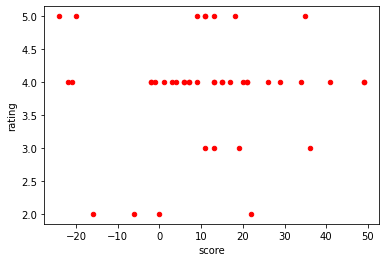

In [1160]:
import matplotlib.pyplot as plt

# a scatter plot comparing score and rating
rating_score_all.plot(kind='scatter',x='score',y='rating',color='red')
plt.show()